In [1]:
# needed for ImageSimulator
import tensorflow as tf
import forward_model as fm
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

# needed to load our images
import utils as ut
import glob
import os

2022-10-05 11:17:24.242895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 11:17:24.361994: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-05 11:17:25.455193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dshteinbok/miniconda3/lib/:/home/dshteinbok/miniconda3/envs/tf/lib/
2022-10-05 11:17:25.455261: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_pl

# Simulated Images
Generate a few simulated images from the given target data (from Waller's Google Drive) and compare them to the simulated images from the same Google Drive.

Later, I'll use the same function in this notebook to generate a whole bunch of images from the SVD of the PSFs for nVue (from Zemax).

In [2]:
# class that allows you to load weights upon instantiation, then just pass images in and get images out
class ImageSimulator:
    def __init__(self, h_path, weights_path):
        self.H, self.weights, self.crop_indices = fm.load_weights(h_path=h_path, weights_path=weights_path)
    def simulate(self, objectPath):
        '''
        objectPath: str path to the image to be simulated.
        
        Returns: obj, sim
            obj: image loaded from objectPath
            sim: simulated image
        '''
        im_in=imageio.v2.imread(objectPath)
        #im_in=np.sum(im_in,-1)/3
        im=cv2.resize(im_in,(648,486))
#         # Read an image from a file
#         input_string = tf.io.read_file(objectPath)
#         # Decode it into a dense vector
#         input_decoded = tf.cast(tf.image.decode_png(input_string, channels=1), tf.float32)
#         # Resize it to fixed shape
#         # input_resized = tf.image.resize(input_decoded, [img_height, img_width])
#         im = input_decoded / 255.0
        # im is of type np.ndarray
        return im, fm.sim_data(im,self.H,self.weights,self.crop_indices)

In [3]:
# instantiate a simulator
miniscopeSimulator = ImageSimulator('../data/SVD_2_5um_PSF_5um_1_ds4_dsz1_comps_green_SubAvg.mat',
                                      '../data/SVD_2_5um_PSF_5um_1_ds4_dsz1_weights_green_SubAvg.mat')

In [4]:
# Load the paths to three images
target_dir = '/home/dshteinbok/TrainingData/Ground_truth_downsampled/'
target_path = sorted(glob.glob(target_dir + '*'))[:3]

input_dir = '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/' 
input_path = sorted(glob.glob(input_dir + '*'))[:3]

print(target_path)
print(input_path)

['/home/dshteinbok/TrainingData/Ground_truth_downsampled/0.png', '/home/dshteinbok/TrainingData/Ground_truth_downsampled/1.png', '/home/dshteinbok/TrainingData/Ground_truth_downsampled/10.png']
['/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/0.png', '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/1.png', '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/10.png']


In [5]:
# make a single 2D array... zip target with Waller's sims
path_pairs = zip(target_path, input_path)

In [6]:
# simulate each of the three images
image_triplets = []
for path_pair in path_pairs:
    obj, sim = miniscopeSimulator.simulate(path_pair[0])
    im_in=imageio.v2.imread(path_pair[1])
    #im_in=np.sum(im_in,-1)/3
    sim_Laura=cv2.resize(im_in,(648,486))
    # Read an image from a file
#     input_string = tf.io.read_file(path_pair[1])
#     # Decode it into a dense vector
#     input_decoded = tf.cast(tf.image.decode_png(input_string, channels=1), tf.float32)
    # Resize it to fixed shape
    # input_resized = tf.image.resize(input_decoded, [img_height, img_width])
    #sim_Laura = input_decoded / 255.0
    image_triplets.append((obj, sim_Laura, sim))

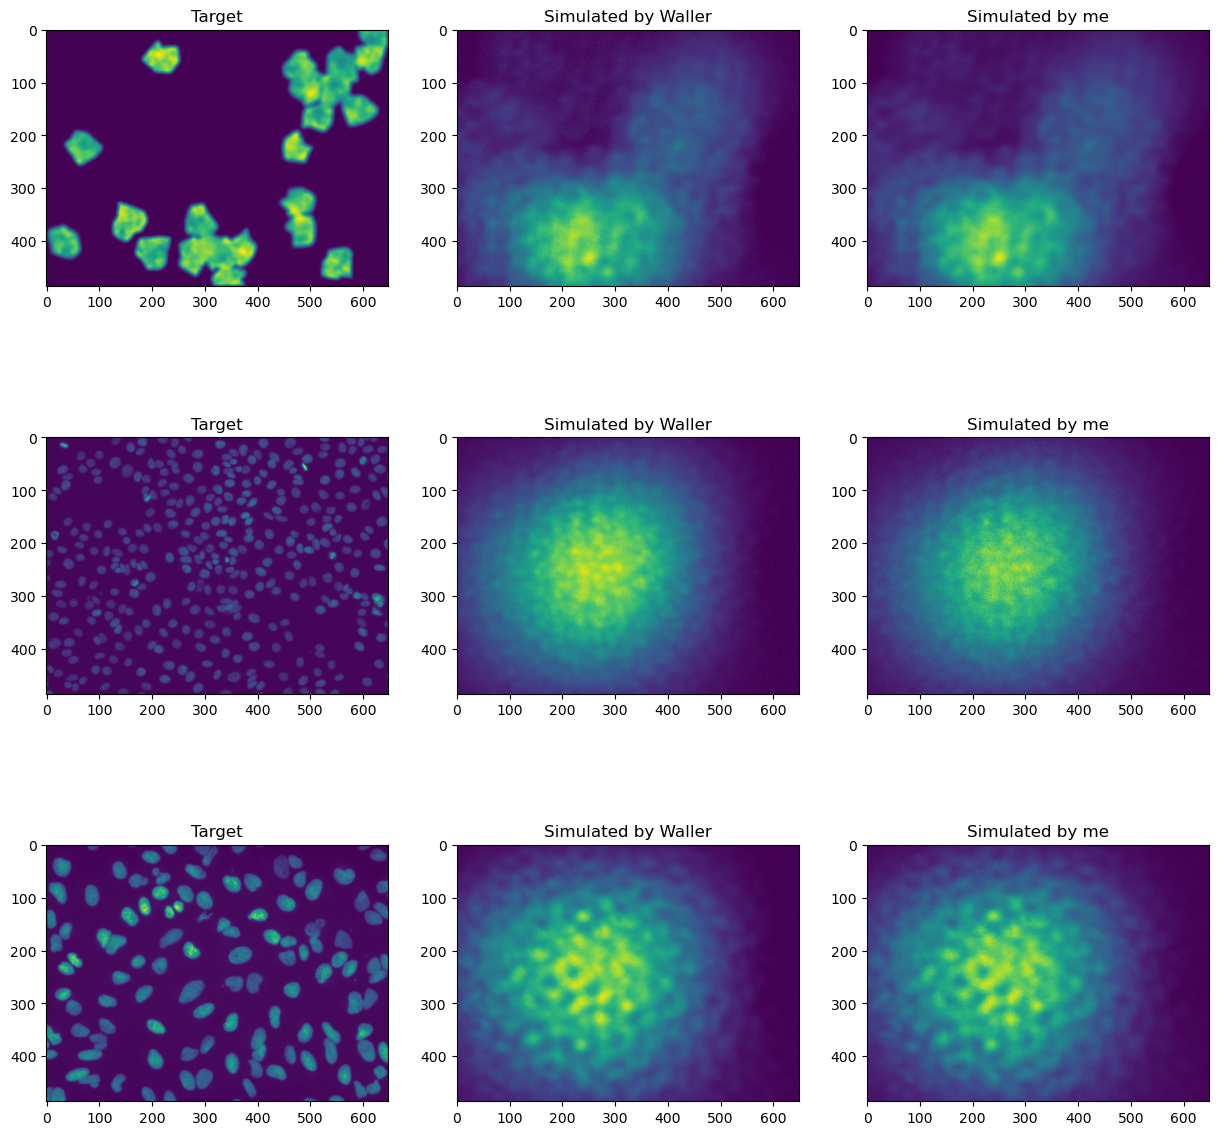

In [7]:
# Draw the set of images
image_titles = ['Target', 'Simulated by Waller', 'Simulated by me']
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for row in range(len(image_triplets)):
    for column in range(3):
        axs[row, column].imshow(image_triplets[row][column])
        axs[row, column].set_title(image_titles[column])

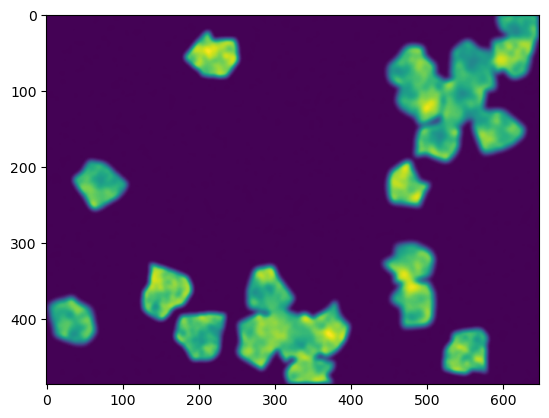

In [8]:
plt.imshow(imageio.v2.imread(target_path[0]))

In [9]:
type(image_triplets[0][1])

numpy.ndarray